In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import os
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras import regularizers

In [4]:
sns.set_style("whitegrid")

In [6]:
nn = pd.read_csv('../data/nn_models_vRegL1.csv')
nn.loc[nn['Unnamed: 0']==0, ['Unnamed: 0']]='epochs'
nn.loc[nn['Unnamed: 0']==1, ['Unnamed: 0']]='hidden_neurons'
nn.loc[nn['Unnamed: 0']==2, ['Unnamed: 0']]='hidden_layers'
nn.loc[nn['Unnamed: 0']==3, ['Unnamed: 0']]='activation'
nn.loc[nn['Unnamed: 0']==4, ['Unnamed: 0']]='r2_train'
nn.loc[nn['Unnamed: 0']==5, ['Unnamed: 0']]='r2_test'
print(nn.shape)
nn.head(6)

(6, 1261)


,Unnamed: 0,model1,model2,model3,model4,model5,model6,model7,model8,model9,...,model1251,model1252,model1253,model1254,model1255,model1256,model1257,model1258,model1259,model1260
0,epochs,50,50,50,50,50,50,50,50,50,...,200,200,200,200,200,200,200,200,200,200
1,hidden_neurons,5,5,5,5,5,5,5,5,5,...,100,100,100,100,100,100,100,100,100,100
2,hidden_layers,1,1,1,1,1,1,1,2,2,...,9,9,9,10,10,10,10,10,10,10
3,activation,relu,relu,relu,relu,relu,relu,relu,relu,relu,...,relu,relu,relu,relu,relu,relu,relu,relu,relu,relu
4,r2_train,0.767177493139766,0.7731823564405294,0.7780088849659437,0.7639709965842975,0.7443761739638564,0.7485955263466167,0.7447819158669,0.7743928212944475,0.7605766571428063,...,0.8743118756089514,0.8379421373019184,0.8817088906088432,0.8623310446962773,0.8813360701690305,0.8386252635530339,0.879685679252549,0.8665445848303253,0.8740642065917972,0.881184186776162
5,r2_test,0.7729807985170473,0.7863405567465785,0.7873429586392116,0.7615581295732288,0.7477935499990529,0.7549564420063439,0.7505409061706845,0.7777078330199059,0.7660937078405978,...,0.7521476346579116,0.7835933074432411,0.7780620619541616,0.760399305220298,0.764375972529673,0.7503914483105985,0.7658356805633514,0.7920441935959,0.7658092798421967,0.7659200814292269


In [24]:
nn_piv = nn.set_index('Unnamed: 0').transpose()
print(nn_piv.shape)
nn_piv.head(5)

(1260, 6)


Unnamed: 0,epochs,hidden_neurons,hidden_layers,activation,r2_train,r2_test
model1,50,5,1,relu,0.767177493139766,0.7729807985170473
model2,50,5,1,relu,0.7731823564405294,0.7863405567465785
model3,50,5,1,relu,0.7780088849659437,0.7873429586392116
model4,50,5,1,relu,0.7639709965842975,0.7615581295732288
model5,50,5,1,relu,0.7443761739638564,0.7477935499990529


In [25]:
nn_piv['r2_train'] = pd.to_numeric(nn_piv['r2_train'])
nn_piv['r2_test'] = pd.to_numeric(nn_piv['r2_test'])


nn_piv.loc[nn_piv.r2_train>=0.8, 'r2_train_check'] = 1
nn_piv.loc[nn_piv.r2_test>=0.8, 'r2_test_check'] = 1
nn_piv['r2_train_check'].fillna(0, inplace=True)
nn_piv['r2_test_check'].fillna(0, inplace=True)

nn_piv

Unnamed: 0,epochs,hidden_neurons,hidden_layers,activation,r2_train,r2_test,r2_train_check,r2_test_check
model1,50,5,1,relu,0.767177,0.772981,0.0,0.0
model2,50,5,1,relu,0.773182,0.786341,0.0,0.0
model3,50,5,1,relu,0.778009,0.787343,0.0,0.0
model4,50,5,1,relu,0.763971,0.761558,0.0,0.0
model5,50,5,1,relu,0.744376,0.747794,0.0,0.0
...,...,...,...,...,...,...,...,...
model1256,200,100,10,relu,0.838625,0.750391,1.0,0.0
model1257,200,100,10,relu,0.879686,0.765836,1.0,0.0
model1258,200,100,10,relu,0.866545,0.792044,1.0,0.0
model1259,200,100,10,relu,0.874064,0.765809,1.0,0.0


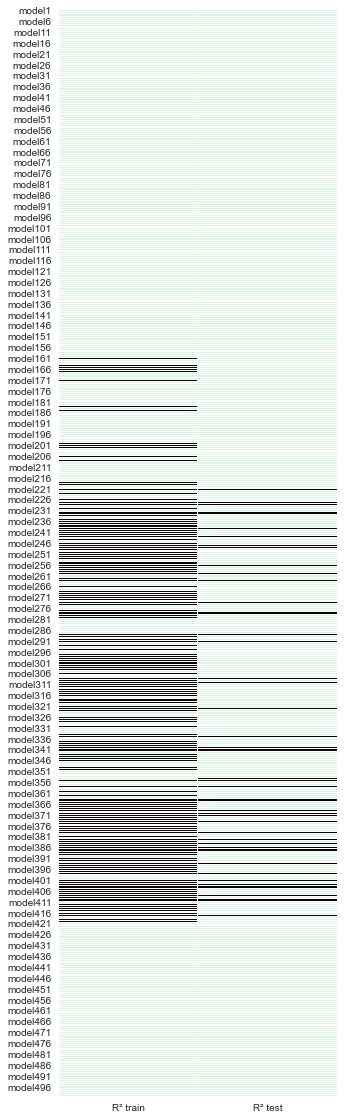

In [52]:
fig, ax = plt.subplots(figsize=(5,20))          

sns.heatmap(nn_piv[['r2_train_check','r2_test_check']].iloc[:500], cmap = "mako_r", 
                  linewidths=0.1, vmin=0, vmax=1, cbar=False, ax=ax)

#hmp.set_title(p, fontsize=40)

ax.set(xticklabels=['R² train','R² test'])
ax.set(xlabel=None)
#plt.show()
plt.savefig('../output/figures/RNN/RNN_Results.png', bbox_inches='tight', dpi=150)